In [67]:
# !pip install --upgrade matplotlib
# !conda install numpy


In [68]:
# Import required libraries and dependencies
import numpy as np
import pandas as pd
# import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
# Load the data into a Pandas DataFrame
df_original = pd.read_csv("data/crypto_market_data.csv", index_col="coin_id")
df_market_data = df_original.copy()
#Print DataFrame Size
print('Shape ', df_market_data.shape)

# Determine Data Types
print(df_market_data.dtypes)

# Display sample data
df_market_data.head()

Shape  (41, 7)
price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [70]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [71]:
# # Plot your data to see what's in your DataFrame
# df_market_data.hvplot.line(width=800, height=400, rot=90)

In [72]:
# pivot dataframe to make charts
df1 = df_market_data.transpose()
df1.head()

coin_id,bitcoin,ethereum,tether,ripple,bitcoin-cash,binancecoin,chainlink,cardano,litecoin,bitcoin-cash-sv,...,ethereum-classic,ethlend,maker,havven,omisego,celsius-degree-token,ontology,ftx-token,true-usd,digibyte
price_change_percentage_24h,1.08388,0.22392,-0.21173,-0.37819,2.90585,2.10423,-0.23935,0.00322,-0.06341,0.92530,...,-0.45950,-13.52786,-0.60285,-4.07216,4.84033,2.51323,-1.35845,0.83416,-0.06197,2.97084
price_change_percentage_7d,7.60278,10.38134,0.04935,-0.60926,17.09717,12.85511,20.69459,13.99302,6.60221,3.29641,...,3.05209,4.21266,8.15400,4.33651,6.82985,0.60354,-1.21399,7.10438,0.16642,0.67038
price_change_percentage_14d,6.57509,4.80849,0.00640,2.24984,14.75334,6.80688,9.30098,5.55476,7.28931,-1.86656,...,-1.26669,-9.80075,-1.48854,-13.29164,-13.21636,24.23919,-10.56222,-0.20629,0.10974,-7.31941
price_change_percentage_30d,7.67258,0.13169,-0.04237,0.23455,15.74903,0.05865,-11.21747,10.10553,1.21662,2.88926,...,2.89572,-29.99499,16.71360,-20.84154,-9.11552,140.79570,-34.70548,-10.56394,0.03090,13.25354
price_change_percentage_60d,-3.25185,-12.88890,0.28037,-17.55245,-13.71793,36.33486,-43.69522,-22.84776,-17.23960,-24.87434,...,-25.90799,2.13917,-18.61722,-39.42657,79.27505,223.06437,-32.70004,5.90295,0.25154,-31.09030


In [73]:
# View sample coin data
df1['bitcoin']

price_change_percentage_24h      1.08388
price_change_percentage_7d       7.60278
price_change_percentage_14d      6.57509
price_change_percentage_30d      7.67258
price_change_percentage_60d     -3.25185
price_change_percentage_200d    83.51840
price_change_percentage_1y      37.51761
Name: bitcoin, dtype: float64

<BarContainer object of 7 artists>

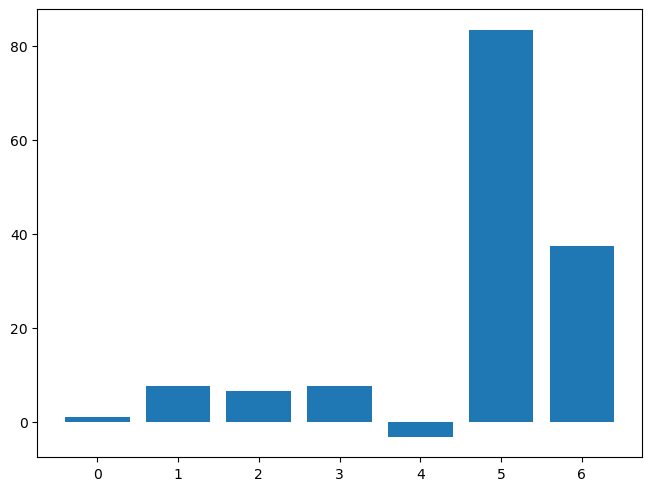

In [74]:
# Sample chart used to validate below charts
fig, ax = plt.subplots(layout='constrained')
ax.bar(x, df1['bitcoin'], label='bitcoin')

C:\Users\ejwda\AppData\Local\Temp\ipykernel_14712\170976604.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(layout='constrained')


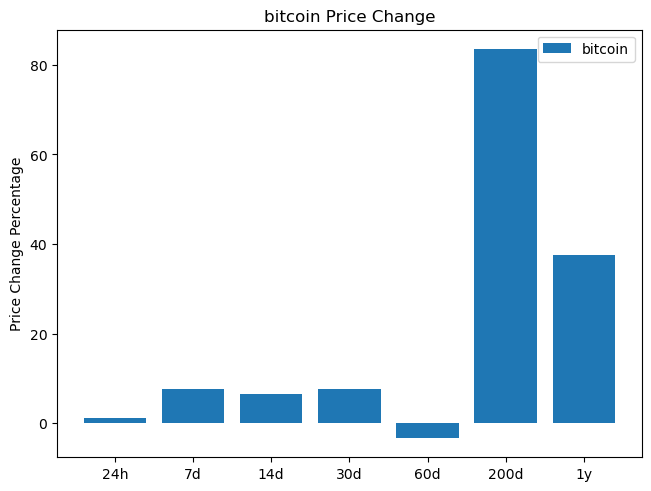

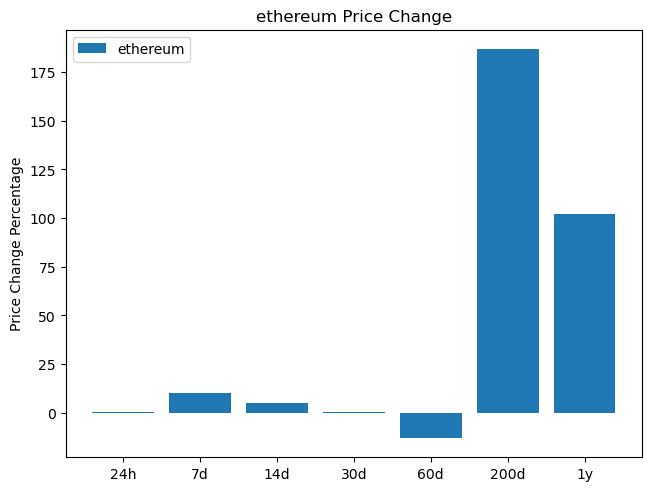

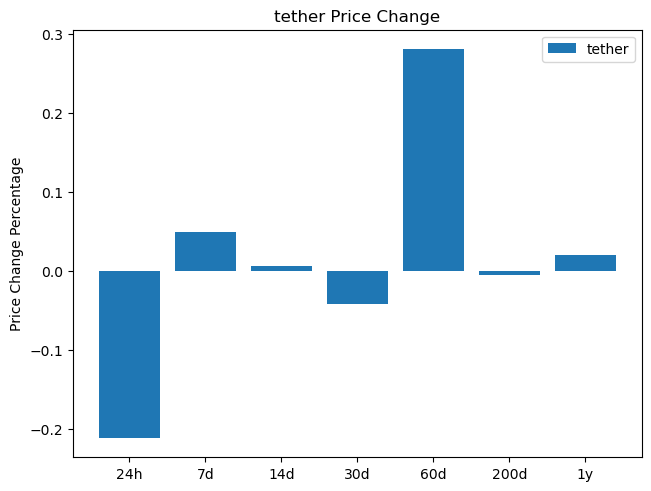

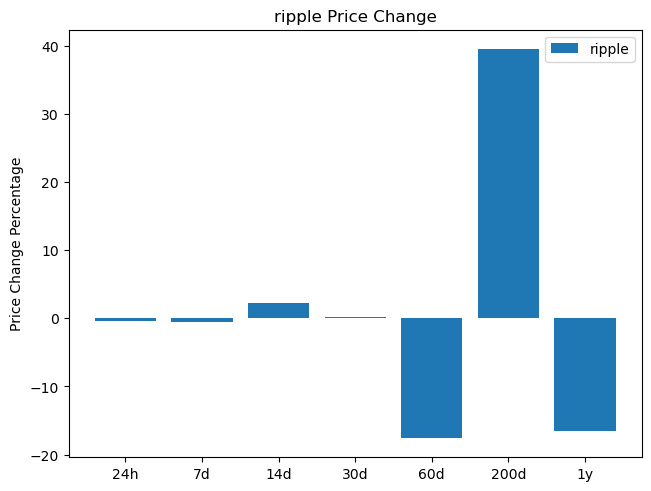

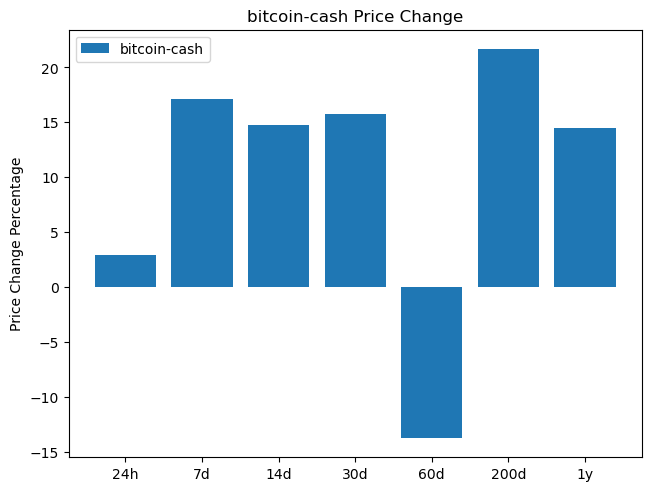

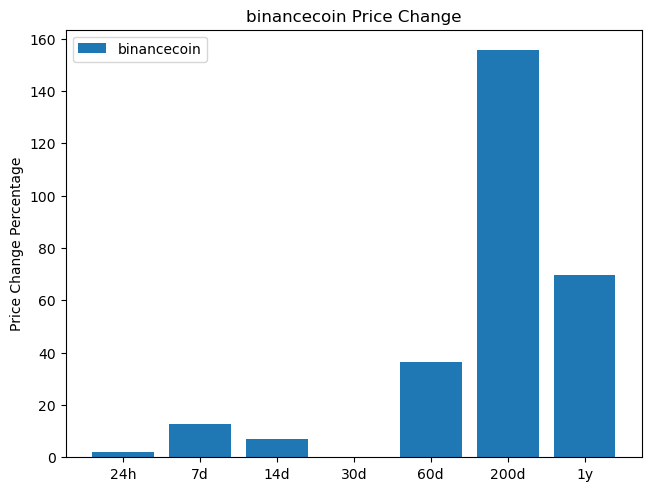

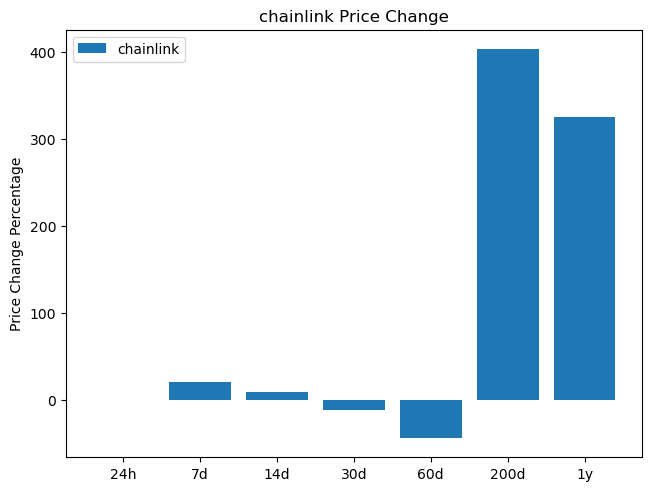

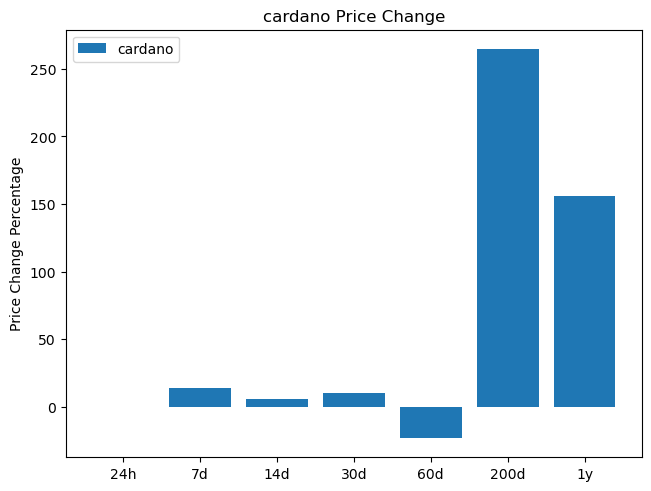

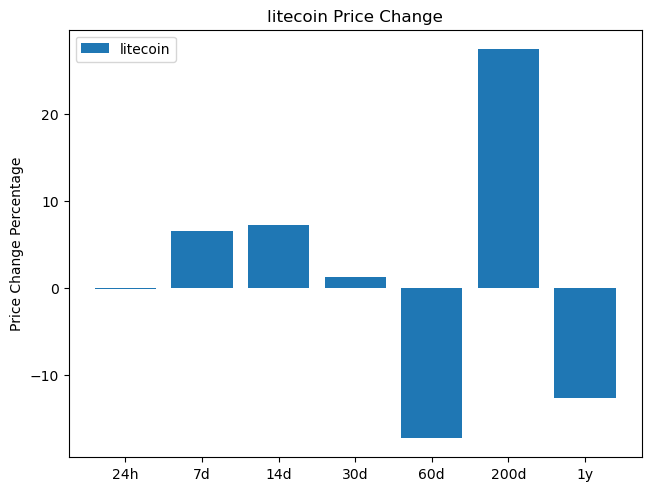

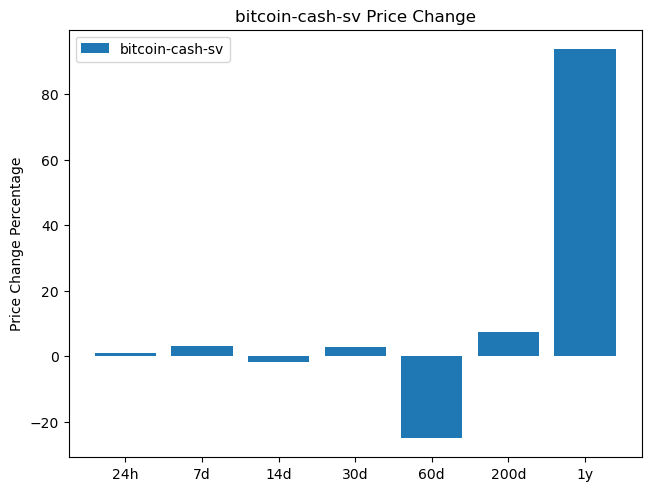

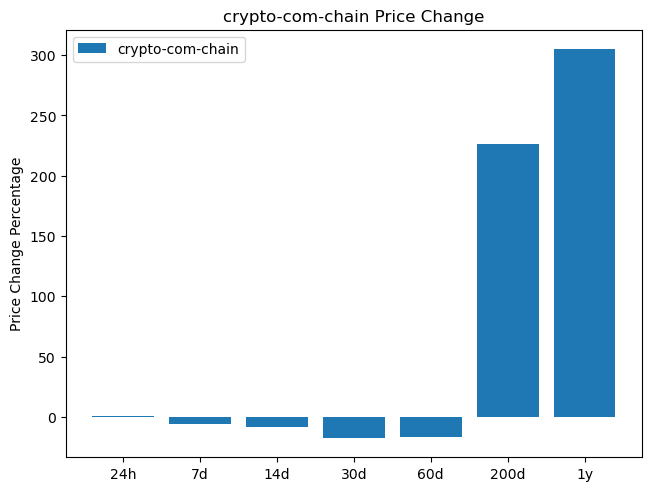

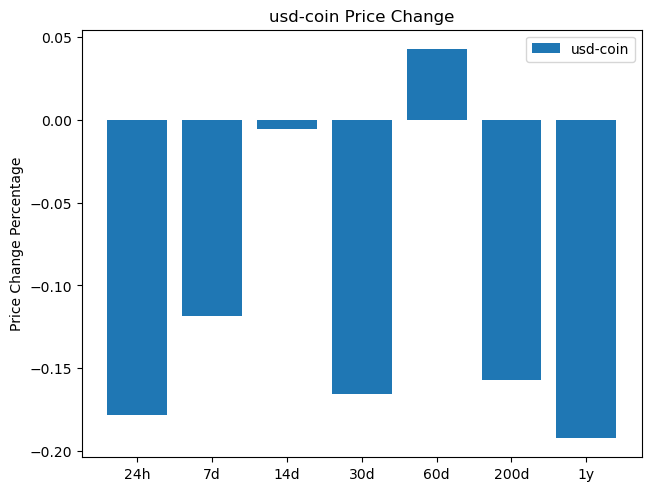

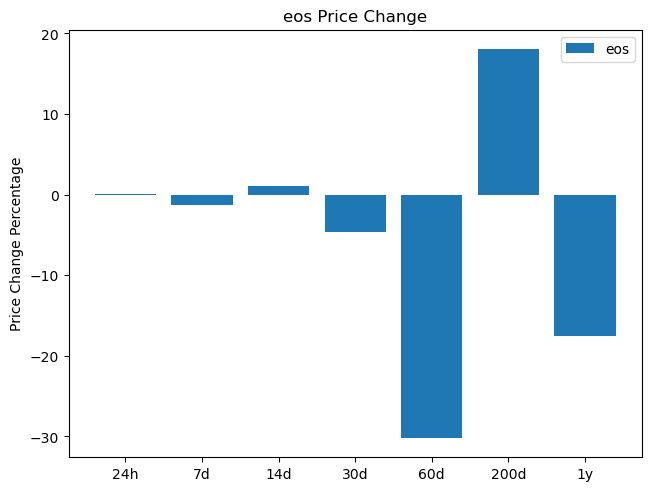

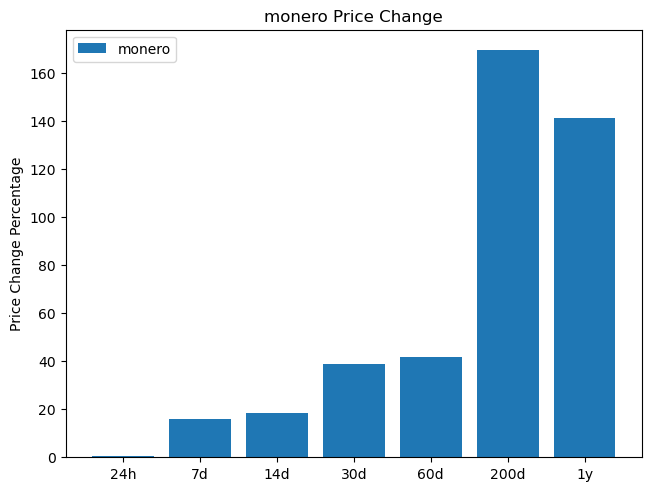

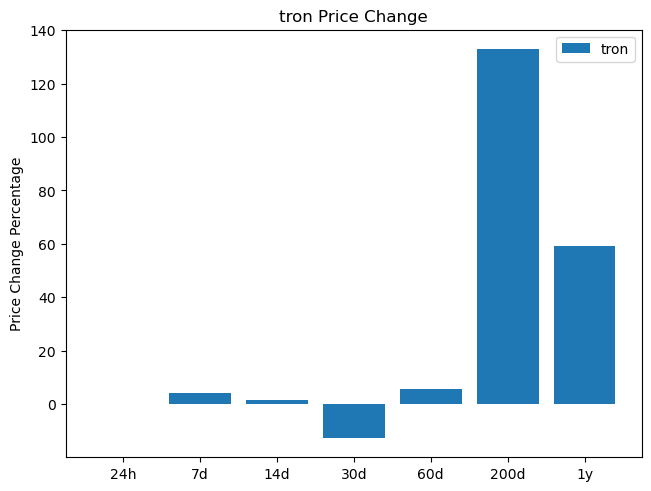

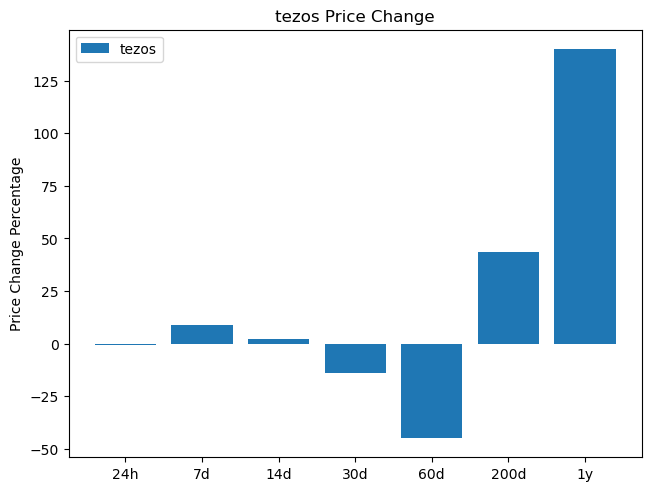

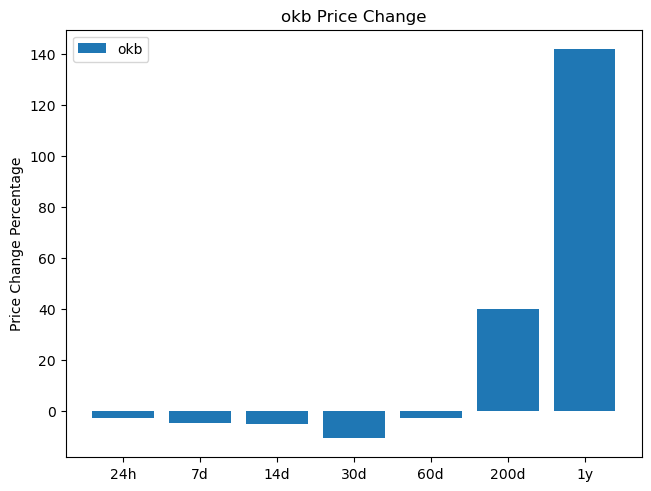

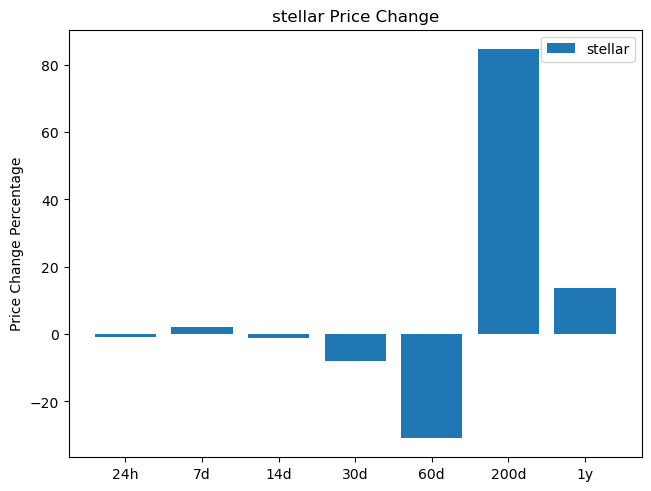

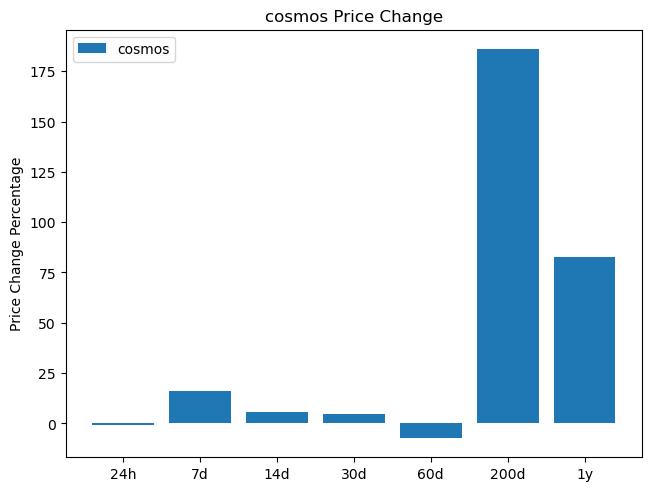

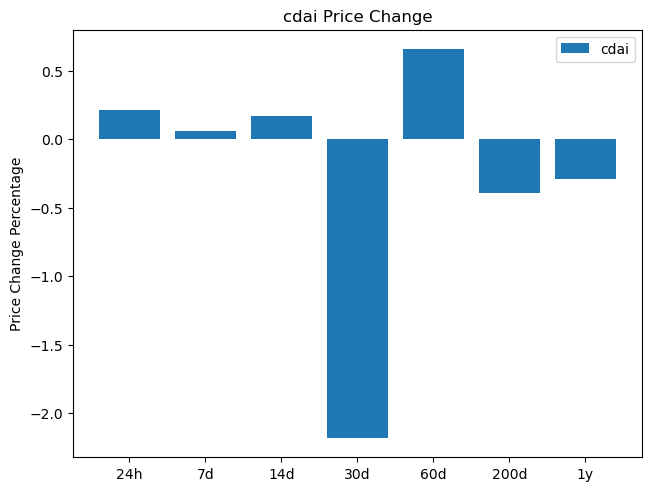

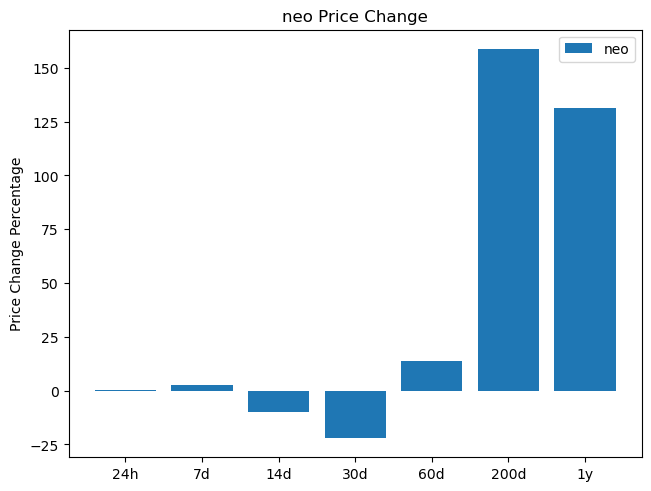

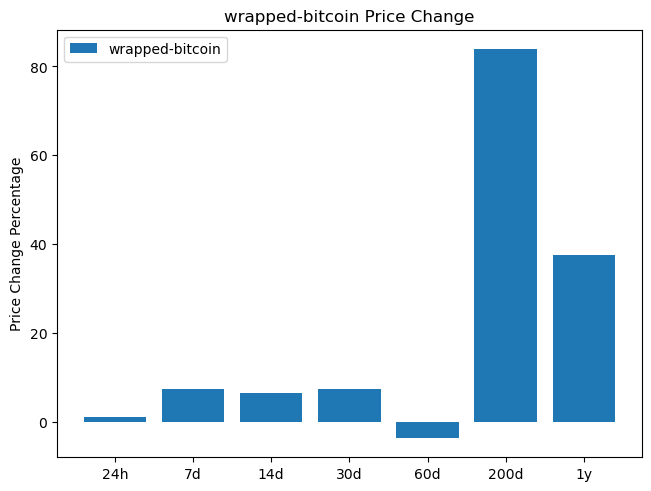

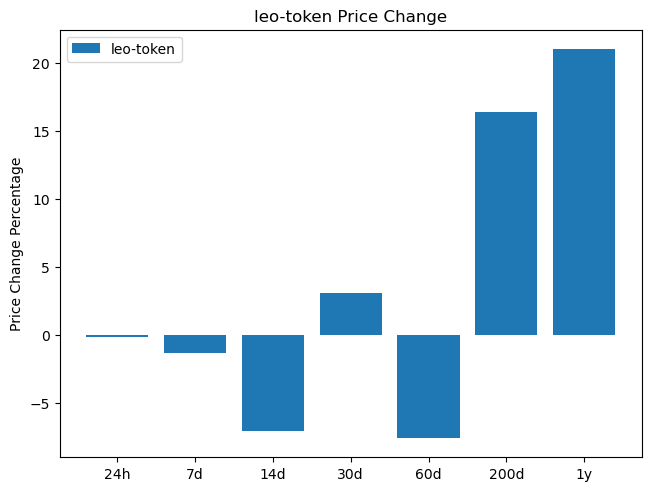

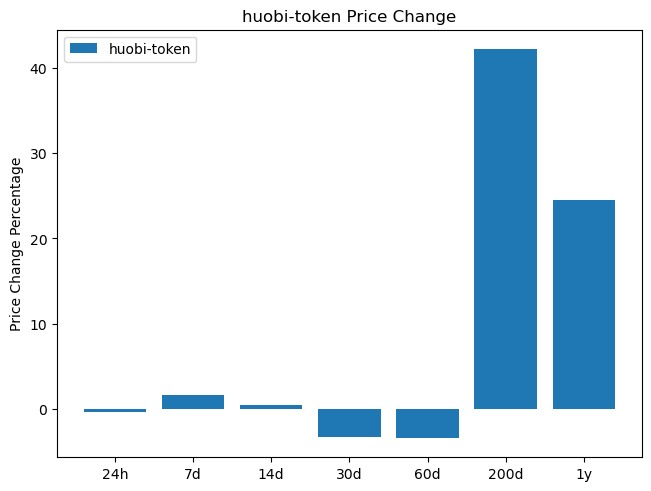

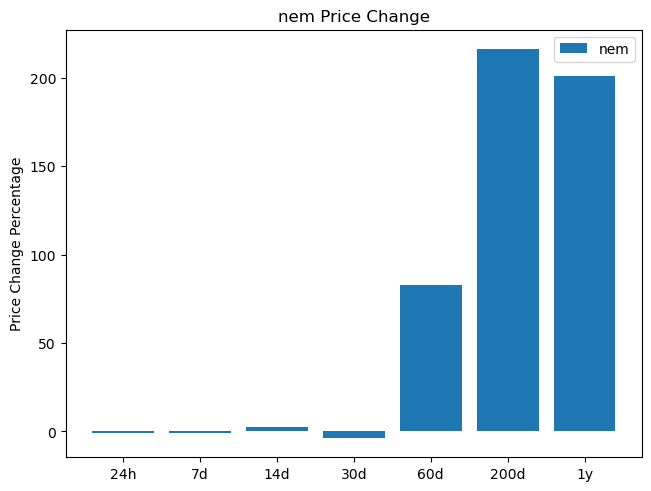

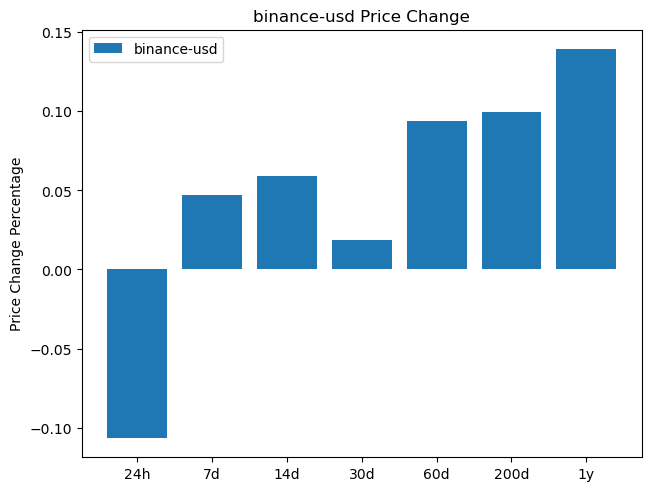

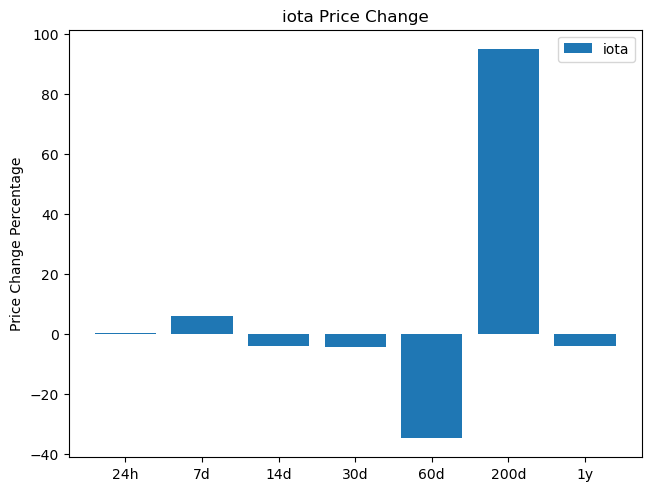

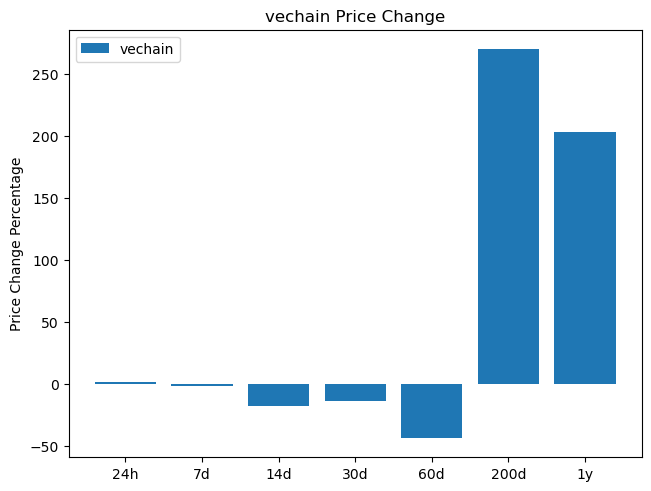

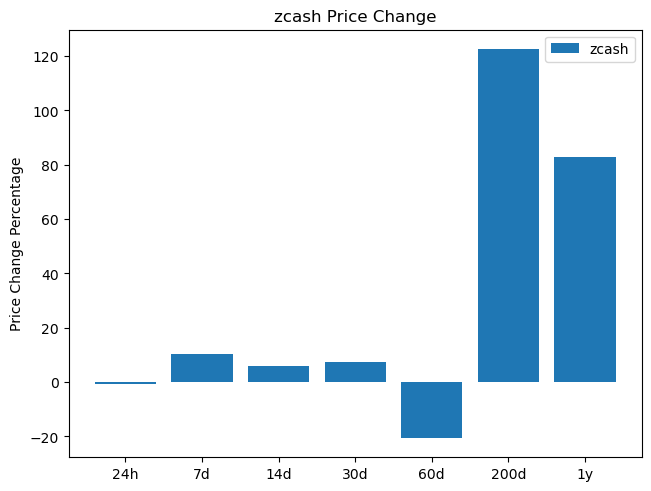

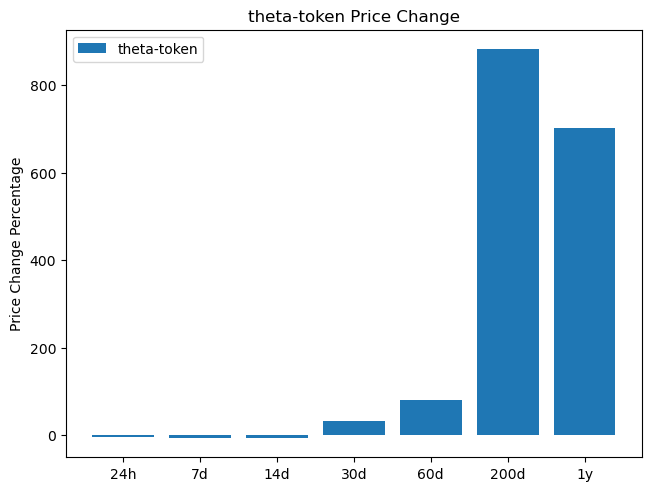

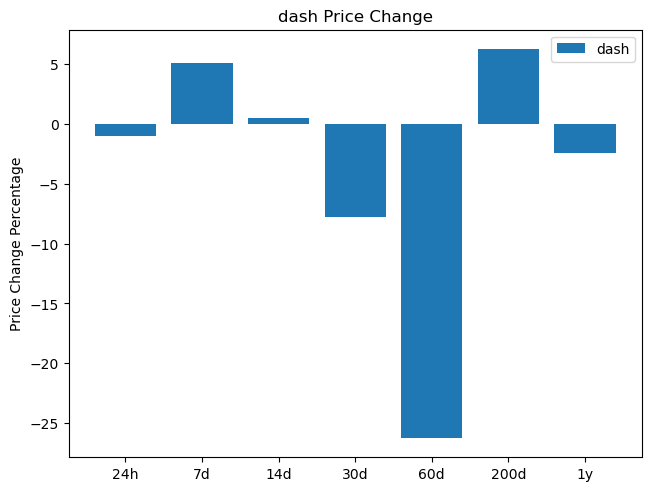

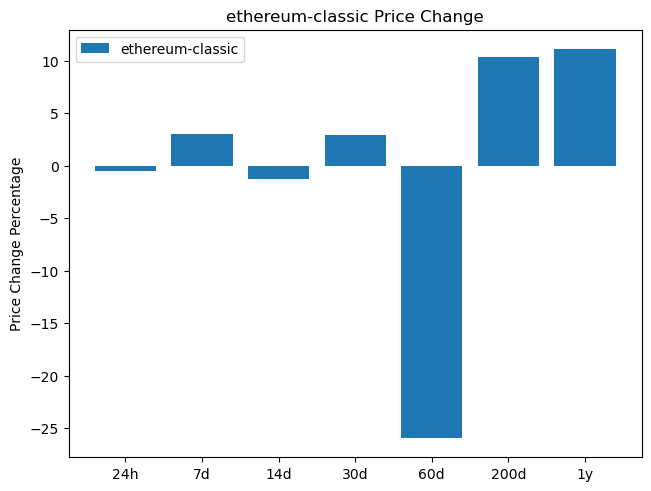

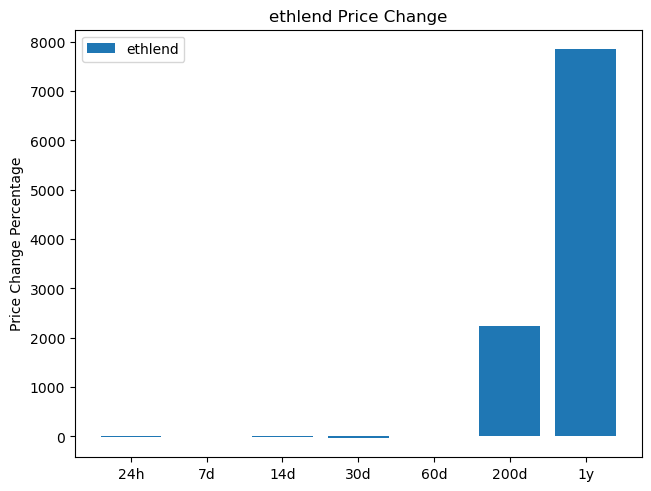

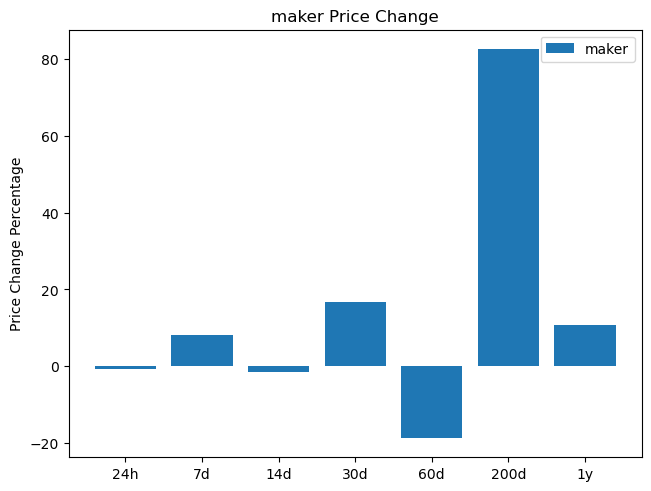

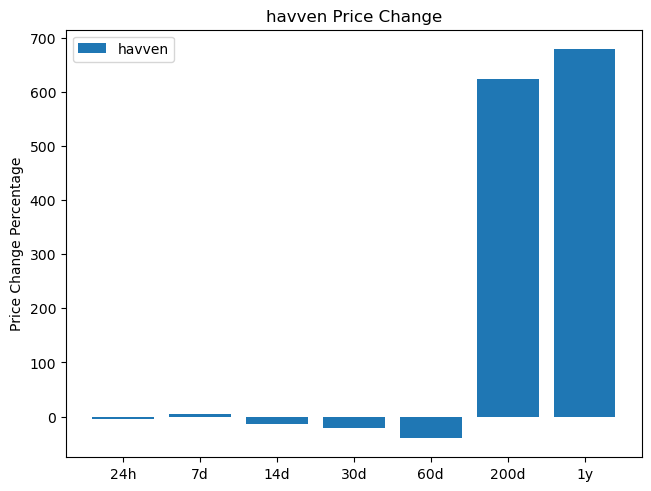

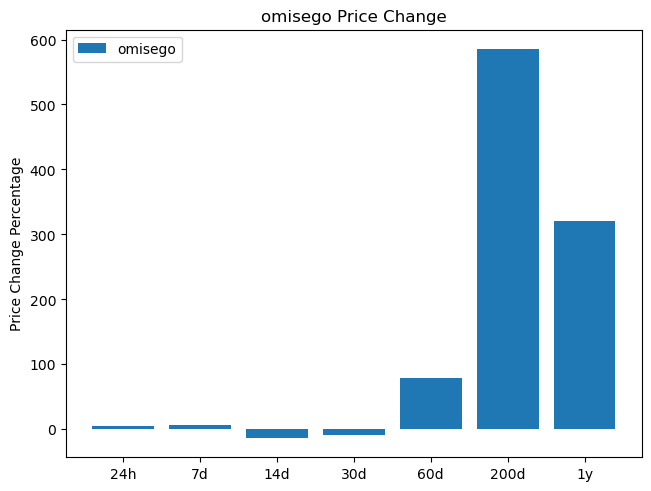

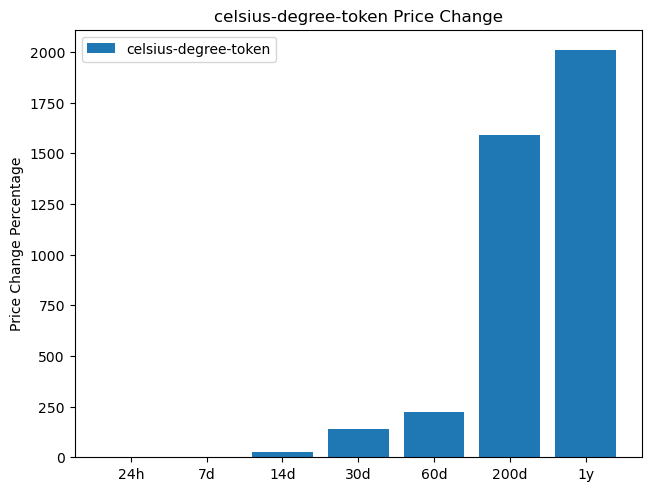

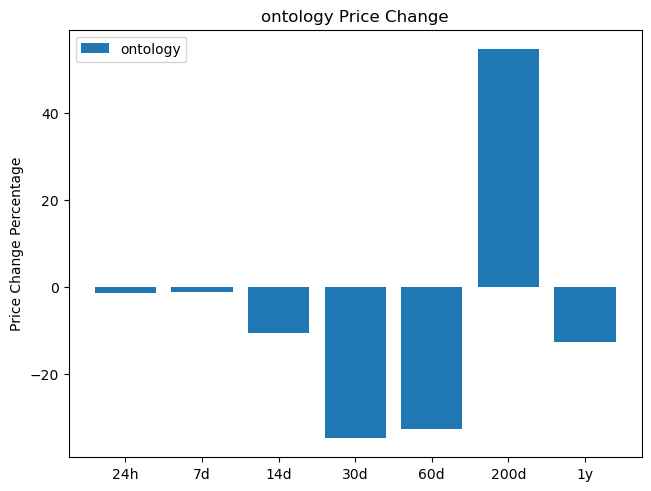

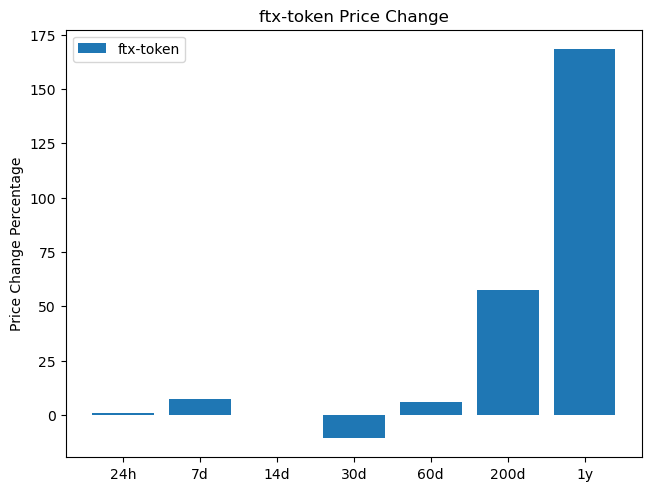

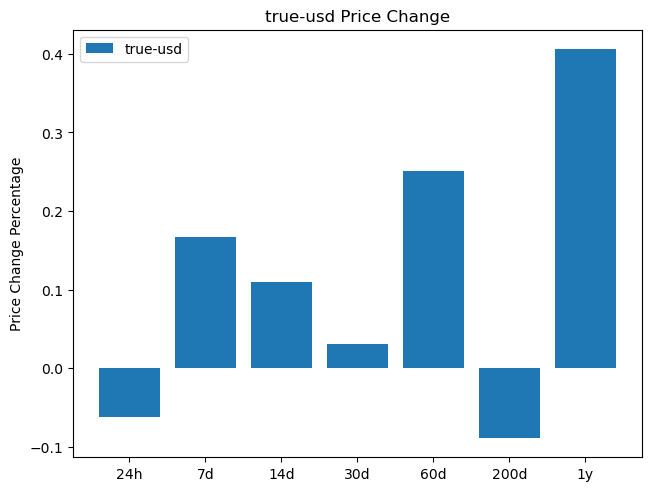

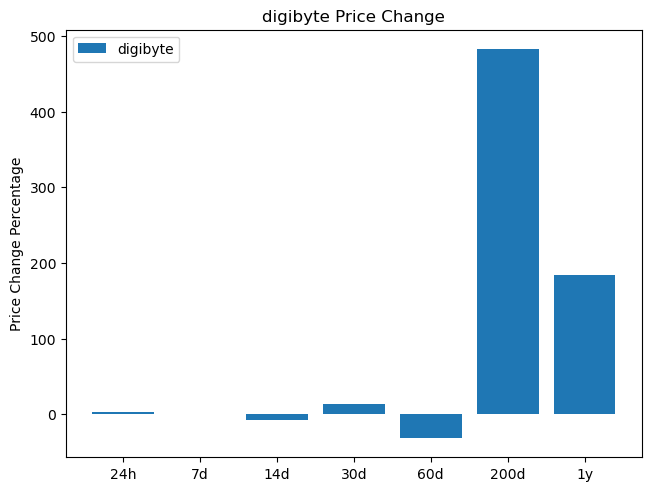

In [75]:
# Chart of one bar chart per coin
period = df1.index
period_labels = ['24h', '7d', '14d', '30d', '60d', '200d', '1y']
coin_names = df1.columns
x = np.arange(len(period))  # the label locations
bar_cap = 5

for index, name in enumerate(coin_names):
    fig, ax = plt.subplots(layout='constrained')
    rects = ax.bar(x, df1[name], label=name)
    # ax.bar_label(rects, padding=3)
    ax.set_ylabel('Price Change Percentage')
    ax.set_title(f'{name} Price Change')
    ax.set_xticks(x, period_labels)
    ax.legend(loc='best')
    # ax.set_ylim(0, 250)

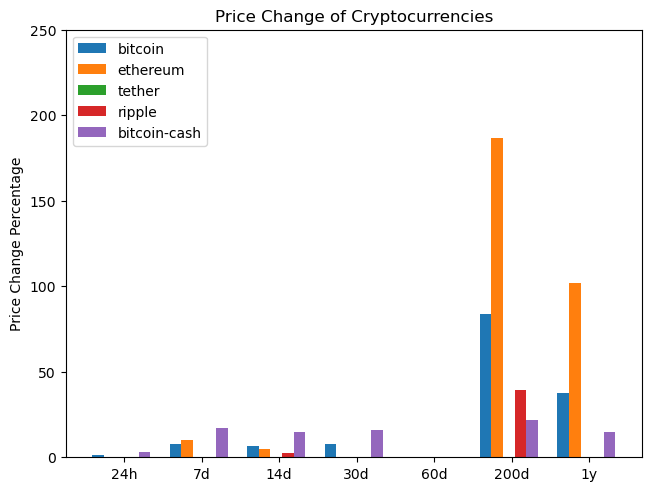

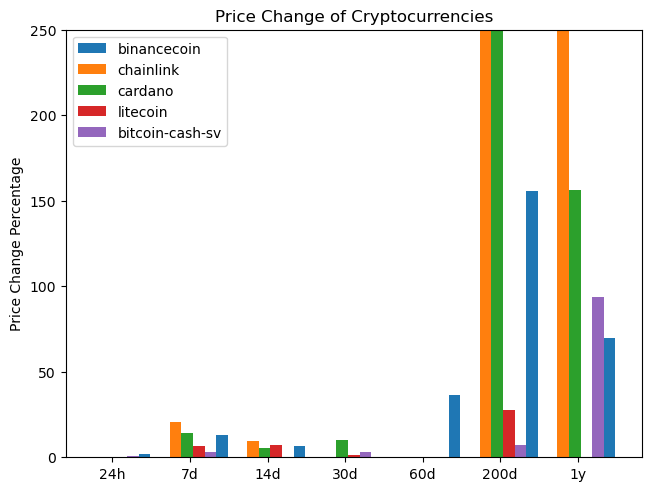

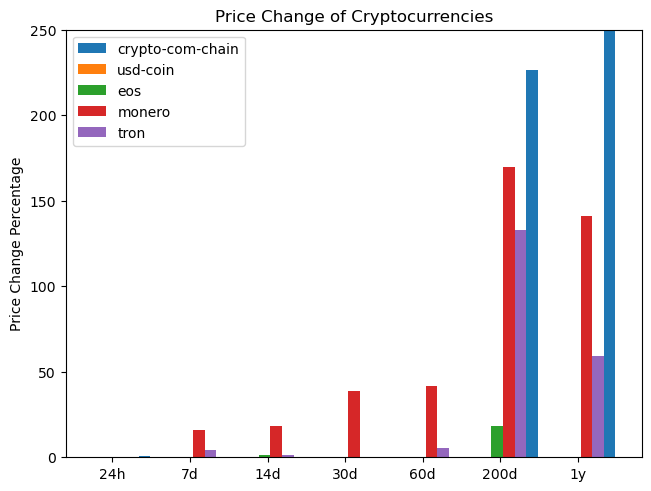

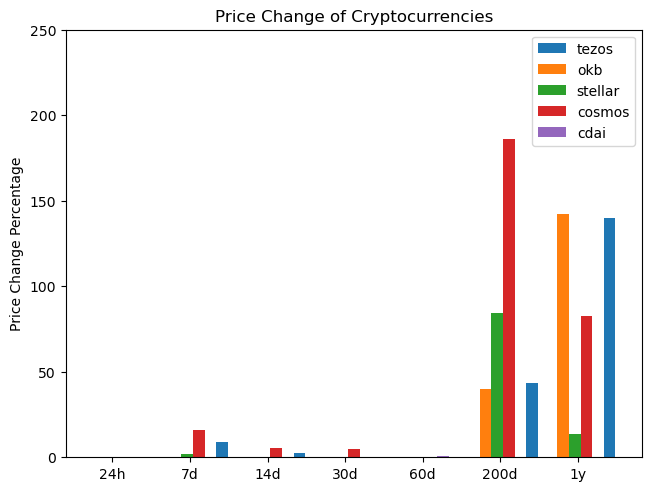

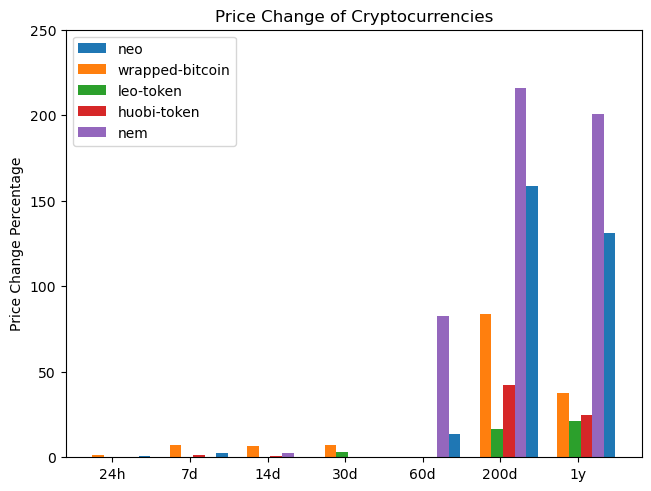

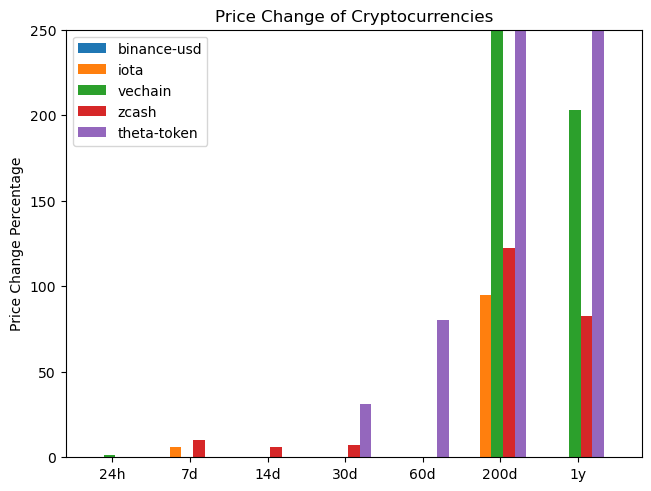

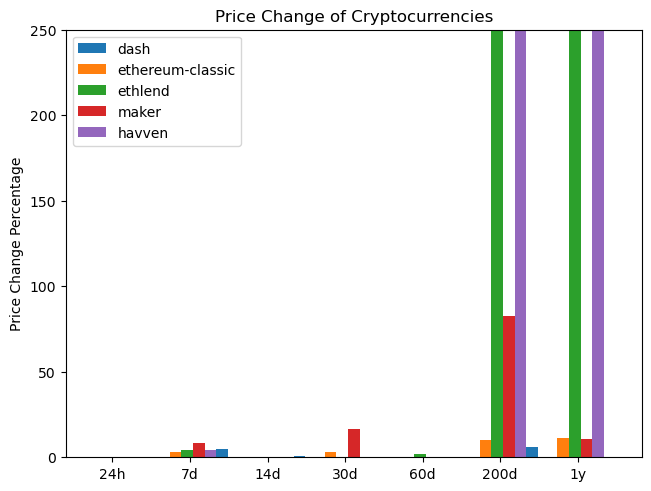

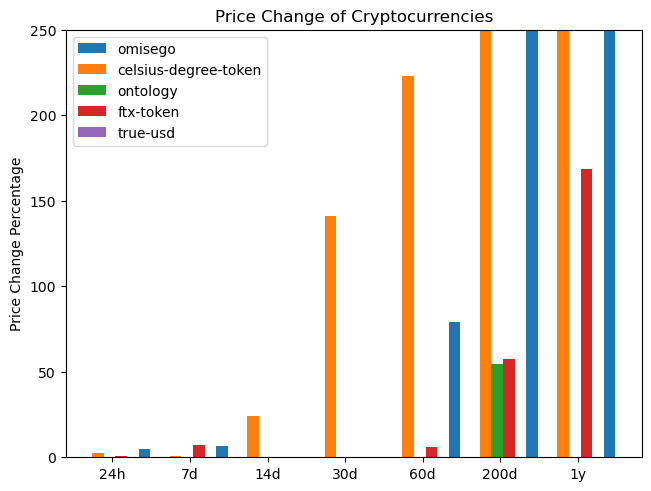

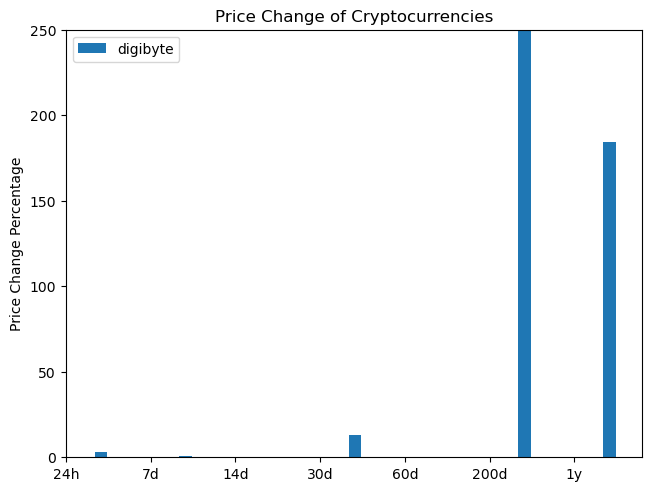

In [76]:
# Chart of 5 coins grouped together per chart
period = df1.index
period_labels = ['24h', '7d', '14d', '30d', '60d', '200d', '1y']
coin_names = df1.columns
x = np.arange(len(period))  # the label locations
bar_cap = 5
width = 0.15  # the width of the bars
multiplier = 0

for index, name in enumerate(coin_names):
    offset = width * multiplier
    if index == 0:
        fig, ax = plt.subplots(layout='constrained')
    elif index % bar_cap == 0:
        fig, ax = plt.subplots(layout='constrained')
        multiplier = 0
    rects = ax.bar(x + offset, df1[name], label=name, width=width)
    multiplier+=1
    
    # ax.bar_label(rects, padding=3)
    ax.set_ylabel('Price Change Percentage')
    ax.set_title(f'Price Change of Cryptocurrencies')
    ax.set_xticks(x + 2.25*width, period_labels)
    ax.legend(loc='best')
    ax.set_ylim(0, 250)


Not really a good way of viewing the data.  The magnitude for hours and days categories is very different than 200 or annual values.  

Taking an average would be informative and then finding the residuals for each coin would be more informative.  

In [77]:
# average for each category
df_market_data.mean()

price_change_percentage_24h      -0.269686
price_change_percentage_7d        4.497147
price_change_percentage_14d       0.185787
price_change_percentage_30d       1.545693
price_change_percentage_60d      -0.094119
price_change_percentage_200d    236.537432
price_change_percentage_1y      347.667956
dtype: float64

It is not clear how the original data was calculated.  There are a couple ways it could be done - I am assuming that data from one year was selected and the percents are based off just time periods from time zero.  This really is just a snap shot of what the trends are for that year.  

Another way of getting interesting information would be to randomly selected dates and calculated the percentages from that specific time.  This would provide information about how long you should invest or if it matters.  

---

### Prepare the Data

In [78]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [79]:
# Create a DataFrame with the scaled data
X_scaled = StandardScaler().fit_transform(df_market_data)

# Copy the crypto names from the original data
column_names = df_market_data.columns
coin_id = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = pd.DataFrame(X_scaled,columns=column_names, index=coin_id)

# Display sample data
df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [80]:
# Create an empty list to store the inertia values
distortion = []
inertia = []
k = range(1, 11)

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_market_data_scaled)

    # distortion.append(sum(np.min(cdist(df_market_data_scaled, km.cluster_centers_, 'euclidean'), axis=1)) / df_market_data_scaled.shape[0])
    inertia.append(km.inertia_)

C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

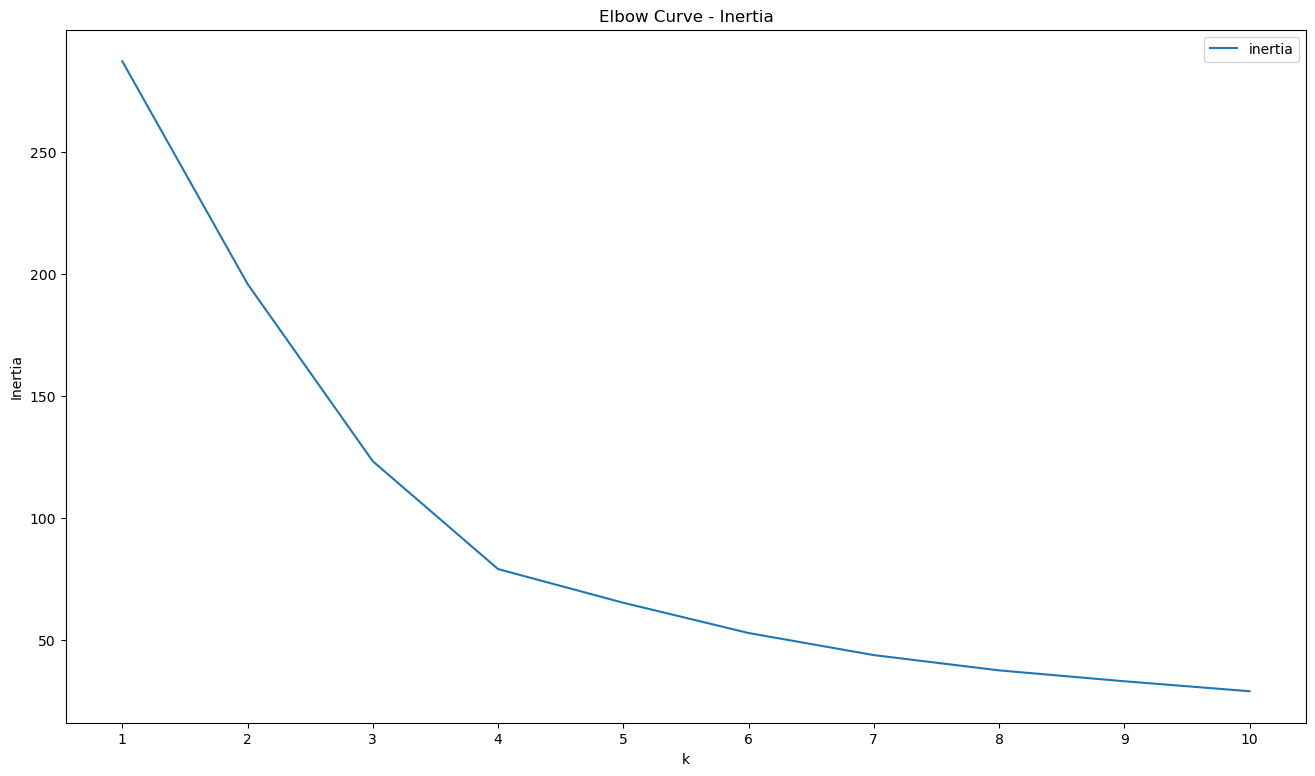

In [81]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
fig_elbow = df_elbow.plot(kind='line', 
              x='k', 
              y='inertia', 
              title='Elbow Curve - Inertia', 
              ylabel='Inertia',
              xticks=k, 
              figsize=(16,9)
             );
fig = fig_elbow.get_figure()
plt.savefig("./images/elbow-inertia-plot2.jpg", dpi=150)



k=4 is the best value 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [82]:
# Peform KMEANS using appropriate k value 
model = KMeans(n_clusters=4, random_state=5)

# Fit the model
model.fit(df_market_data_scaled)

# Predict clusters
predictions = model.predict(df_market_data_scaled)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
df_market_data['Class'] = predictions 

C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [83]:
# Display sample data
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

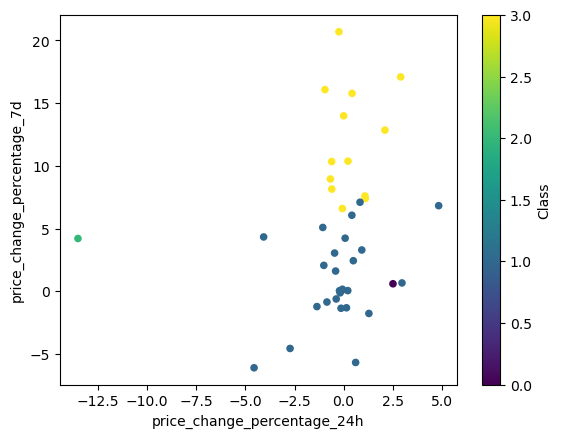

In [84]:
df_market_data.plot.scatter(x="price_change_percentage_24h",y="price_change_percentage_7d", c="Class", colormap='viridis') 

---

### Optimize Clusters with Principal Component Analysis.

In [85]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3, random_state=40)
crypto_pca = pca.fit_transform(X_scaled)


In [86]:
# Explained Variance
print('Explained Variance of PC: ', pca.explained_variance_)
print('Total Explained Variance: ', sum(pca.explained_variance_))

Explained Variance of PC:  [2.6689967  2.48978331 1.26307212]
Total Explained Variance:  6.421852139197311


In [87]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(crypto_pca, columns=['PC1','PC2','PC3'], index=coin_id) 
df_market_data_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [88]:
# Create an empty list to store the inertia values
distortion = []
inertia = []
k = range(1, 11)

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_market_data_pca)

    # distortion.append(sum(np.min(cdist(df_market_data_scaled, km.cluster_centers_, 'euclidean'), axis=1)) / df_market_data_scaled.shape[0])
    inertia.append(km.inertia_)


C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

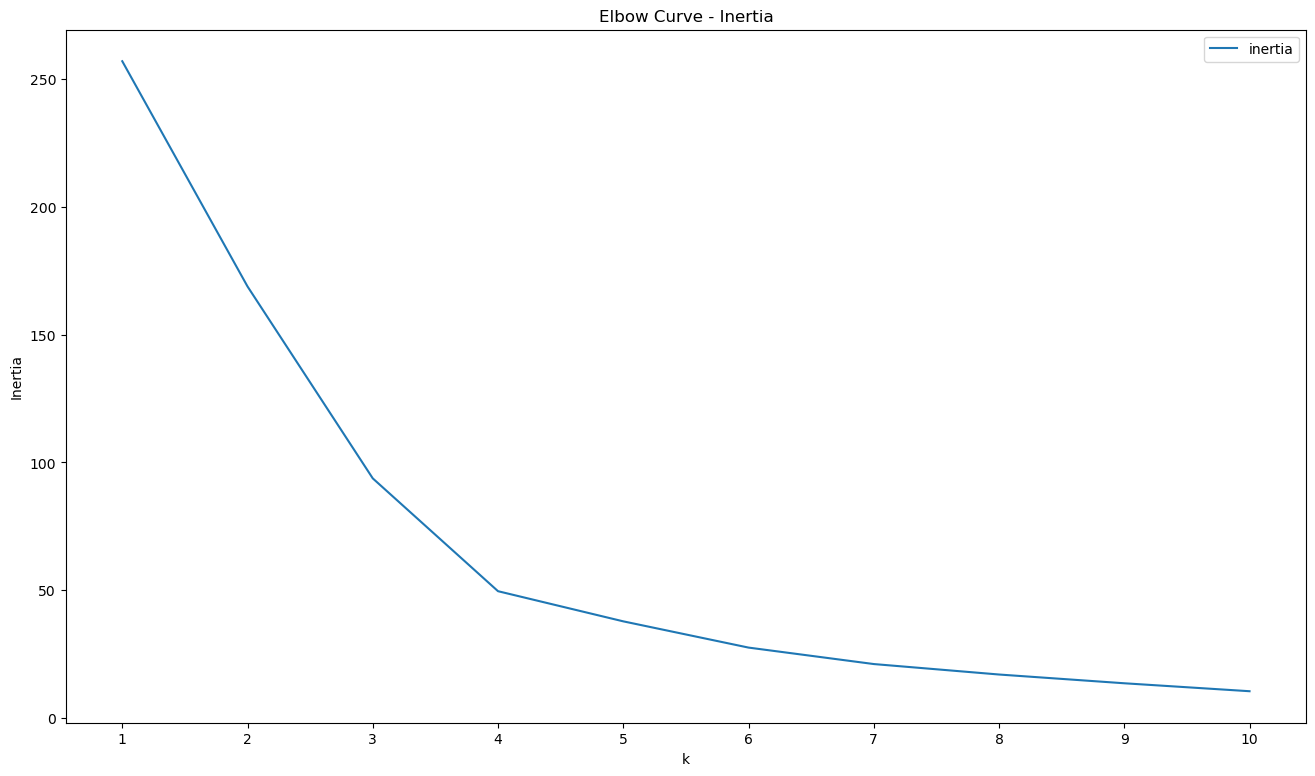

In [89]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
fig_elbow = df_elbow.plot(kind='line', 
              x='k', 
              y='inertia', 
              title='Elbow Curve - Inertia', 
              ylabel='Inertia',
              xticks=k, 
              figsize=(16,9)
             );
fig = fig_elbow.get_figure()
plt.savefig("./images/elbow-inertia-plot3.jpg", dpi=150)


The best k value is 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [90]:
# Peform KMEANS using appropriate k value 
model = KMeans(n_clusters=4, random_state=5)

# Fit the model
model.fit(df_market_data_pca)

# Predict clusters
predictions = model.predict(df_market_data_pca)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
df_market_data_pca['Class2'] = predictions 


C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [91]:
df_market_data_pca.head()


,PC1,PC2,PC3,Class2
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


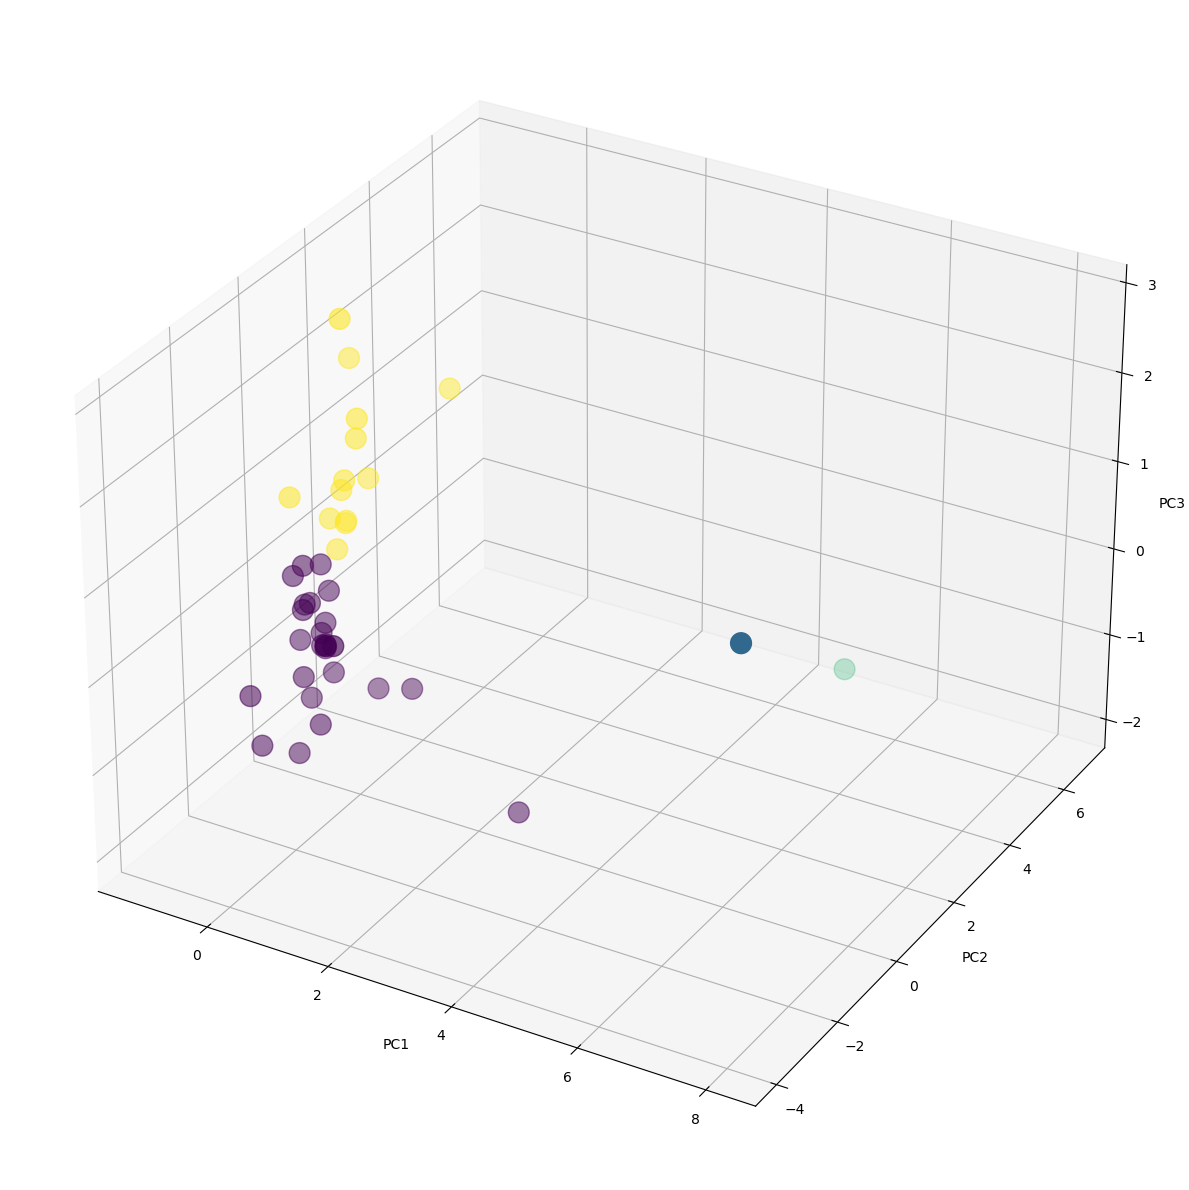

In [93]:
# 3D Figure of Principle Components (first 3 components)

fig_3d = plt.figure(figsize=(12,12))
ax_3d = fig_3d.add_subplot(projection='3d')

xs = df_market_data_pca['PC1']
ys = df_market_data_pca['PC2']
zs = df_market_data_pca['PC3']
m = list(df_market_data_pca['Class2'])

# color_map = plt.get_cmap('spring')
ax_3d.scatter(xs, ys, zs, c=m, s=225);

ax_3d.set_xlabel('PC1')
ax_3d.set_ylabel('PC2')
ax_3d.set_zlabel('PC3')

plt.tight_layout()
fig = fig_3d.get_figure()
plt.savefig("./images/cluster-plot2.jpg", dpi=150)
plt.show()

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

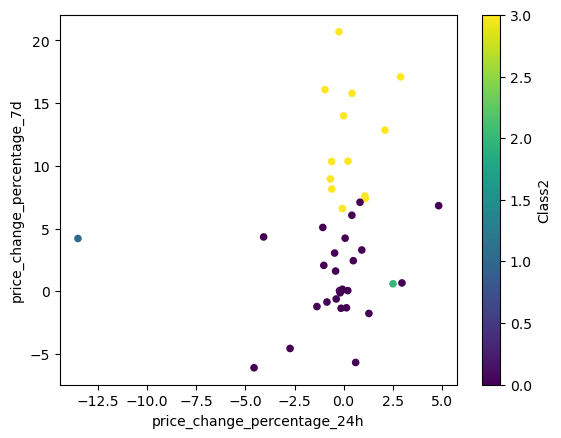

In [97]:
df_pca_classes = df_original.copy()
df_pca_classes['Class2'] = predictions 
df_pca_classes.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="Class2", colormap='viridis') 

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 